In [1]:
import pickle
import random

import matplotlib.pyplot as plt 
import os.path as osp

from glob import glob 

import numpy as np

In [2]:
data_path = '/home/sss/#data/FEM_Simulation/2022.04.22 various anomaly/train'

data_files = glob(osp.join(data_path, '*.pkl'))
data_files.sort()

# for elem in data_list :
#     print(elem)

In [3]:
import json
 
# Opening JSON file
f = open('/home/sss/brg-anomaly/log/test/results.json',)
 
# returns JSON object as
# a dictionary
data = json.load(f)


In [8]:
anomal_list =  [None, 'inertia_loss',]
sns_loc = [0]
data_list = []
anomal_in_data_list = []
threshold = 1.0
num_correct_answers = 0
class_to_check = 'inertia_loss'
num_data_to_check = 0
for idx, data_file in enumerate(data_files) : 
    datum = [data_file]

    with open(data_file, 'rb') as f: 
        datum_dict = pickle.load(f)   

    
    anomal_type = [datum_dict['anomal_type'][i] for i in sns_loc]
    
    print("Anomaly type{}".format(anomal_type))
    anomal_target = [anomal_list.index(i) for i in anomal_type] 
    datum.append(anomal_target)
    data_list.append(datum)
    
    anomal_in_data_list.append(anomal_target)
    anomaly_score = data['test_scores'][idx][2]
    anomaly_label = data['test_scores'][idx][1]
    print(anomal_type, class_to_check)
    if class_to_check == anomal_type[0] :
        num_data_to_check += 1
        if anomaly_score > threshold :
            datum_anomaly_prediction = 1
        else : 
            datum_anomaly_prediction = 0
        
        if datum_anomaly_prediction == anomaly_label :
            
            num_correct_answers += 1

    
    
# print(num_correct_answers/len(data_files))
print(num_correct_answers/num_data_to_check)

Anomaly type['inertia_loss']
['inertia_loss'] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type['inertia_loss']
['inertia_loss'] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type['inertia_loss']
['inertia_loss'] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type['inertia_loss']
['inertia_loss'] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type['inertia_loss']
['inertia_loss'] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type['inertia_loss']
['inertia_loss'] inertia_loss
Anomaly type[None]
[None] inertia_loss
Anomaly type[None]
[No

In [9]:
anomal_in_data_list = np.array(anomal_in_data_list)

(unique, counts) = np.unique(anomal_in_data_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  0, 302],
       [  1, 198]])

In [10]:
import json
 
# Opening JSON file
f = open('/home/user/brg-anomaly/log/DeepSAD/bridgeFEM_mlp_skip_connect/results.json',)
 
# returns JSON object as
# a dictionary
data = json.load(f)


FileNotFoundError: [Errno 2] No such file or directory: '/home/user/brg-anomaly/log/DeepSAD/bridgeFEM_mlp_skip_connect/results.json'

In [43]:
from glob import glob 
import os.path as osp
import pickle
import matplotlib.pyplot as plt

data_path = '/home/sss/#data/FEM_Simulation/2022.04.26 test3/test'

data_files = glob(osp.join(data_path, '*.pkl'))
data_files.sort()

# for elem in data_list :
#     print(elem)
# idx = random.randint(0, len(data_files)-1)

idx = 415
data_file_path = data_files[idx]

print("File name : {}".format(osp.basename(data_file_path)))

with open(data_file_path, 'rb') as f: 
    data = pickle.load(f)

data

File name : data_0416.pkl


{'is_anomal': False,
 'sns_loc': [4, 7, 11, 15],
 'acc': [array([-0.05053919,  0.04396097,  0.01593224, ..., -0.13763964,
         -0.13342941, -0.23294968]),
  array([-0.05053919,  0.04396097,  0.01593224, ..., -0.19778941,
         -0.1959295 , -0.29829043]),
  array([-0.05053919,  0.04396097,  0.01593224, ..., -0.14764633,
         -0.14325667, -0.24643973]),
  array([-0.05053919,  0.04396097,  0.01593224, ...,  0.00164498,
          0.01217278, -0.08569439])],
 'disp': [array([-0.0032747 ,  0.00242944,  0.0002644 , ...,  0.00146643,
          0.00153231,  0.00273439]),
  array([-0.0032747 ,  0.00242944,  0.0002644 , ...,  0.00178957,
          0.0018699 ,  0.00308261]),
  array([-0.0032747 ,  0.00242944,  0.0002644 , ...,  0.00160798,
          0.00168   ,  0.00288759]),
  array([-0.0032747 ,  0.00242944,  0.0002644 , ...,  0.00085371,
          0.0008919 ,  0.00207515])],
 'sample_rate': 128,
 'anomal_type': None}

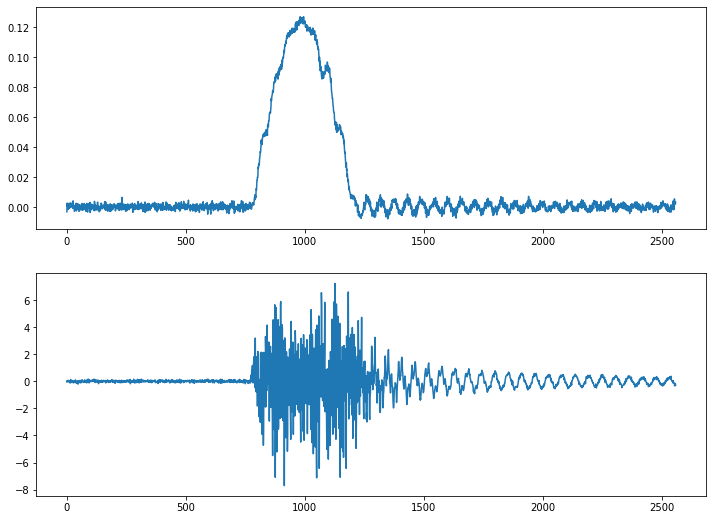

In [44]:
fig, axs = plt.subplots(2, 1, figsize = (12, 9))
axs[ 0].plot(data['disp'][1])
# axs[0, 0].set_ylim([-2, 2])
axs[ 1].plot(data['acc'][1])
# axs[0, 1].set_ylim([-2, 2])
# axs[1, 0].plot(data['acc'][6])
# # axs[1, 0].set_ylim([-2, 2])
# axs[1, 1].plot(data['acc'][7])
# axs[1, 1].set_ylim([-2, 2])

# axs[0, 0].set_xlabel('X axis', fontsize = 20)
# axs[0, 0].set_ylabel('Y axis', fontsize = 20)
# axs[0, 1].set_ylabel('X axis', fontsize = 20)
# axs[0, 1].set_ylabel('Y axis', fontsize = 20)
# axs[1, 0].set_xlabel('X axis', fontsize = 20)
# axs[1, 1].set_ylabel('Y axis', fontsize = 20)


File name : data_00001.pkl


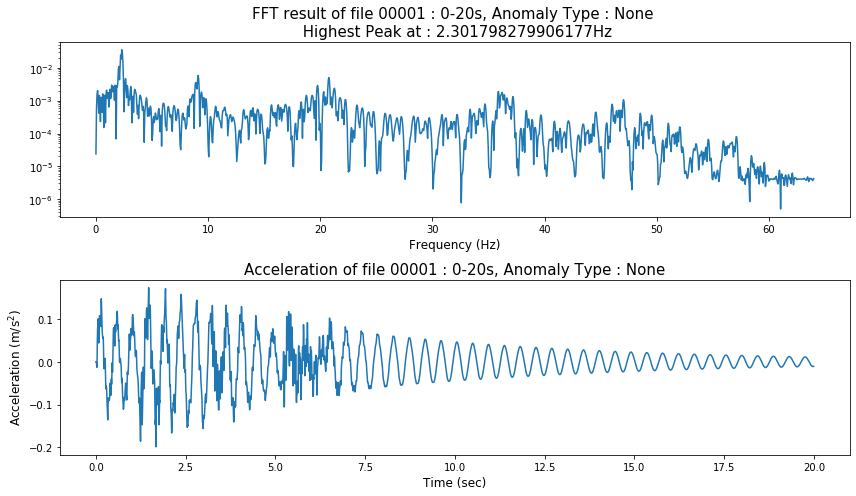

In [66]:
from scipy.fftpack import fft, fftfreq

idx = 0
data_file_path = data_files[idx]

print("File name : {}".format(osp.basename(data_file_path)))

with open(data_file_path, 'rb') as f: 
    data = pickle.load(f)

freq = 128

start_sec = 0
end_sec = 20


start = start_sec*freq
end = end_sec*freq
n_sample =  end - start
data_plot = data['acc'][6][start:end]
fft_result = fft(data_plot)
file_name = osp.basename(data_file_path)
file_number = file_name.split('_')[1]
file_number = file_number.split('.')[0]

xf = np.linspace(0.0, 1.0/(2.0)*freq, n_sample//2)
fft_abs = np.abs(fft_result[:int(len(fft_result)/2)])
highest_peak_loc = xf[np.argmax(fft_abs)]


fig, axs = plt.subplots(2, 1, figsize = (12, 7))

axs[0].semilogy(xf, 2.0/n_sample * fft_abs)
axs[0].set_title(
      f"FFT result of file {file_number} : {start_sec}-{end_sec}s, Anomaly Type : {data['anomal_type'][0]} \n Highest Peak at : {highest_peak_loc:.15f}Hz",
     fontsize=15)
axs[0].set_xlabel("Frequency (Hz)", fontsize=12)

axs[1].plot(np.arange(start=0, stop = n_sample / freq, step = 1 / freq), data_plot)
axs[1].set_title(f"Acceleration of file {file_number} : {start_sec}-{end_sec}s, Anomaly Type : {data['anomal_type'][0]}", fontsize=15)
axs[1].set_xlabel("Time (sec)", fontsize=12)
axs[1].set_ylabel("Acceleration (m/s$^2$)", fontsize=12)

fig.tight_layout()

File name : data_00001.pkl


Text(0, 0.5, 'Acceleration (m/s$^2$)')

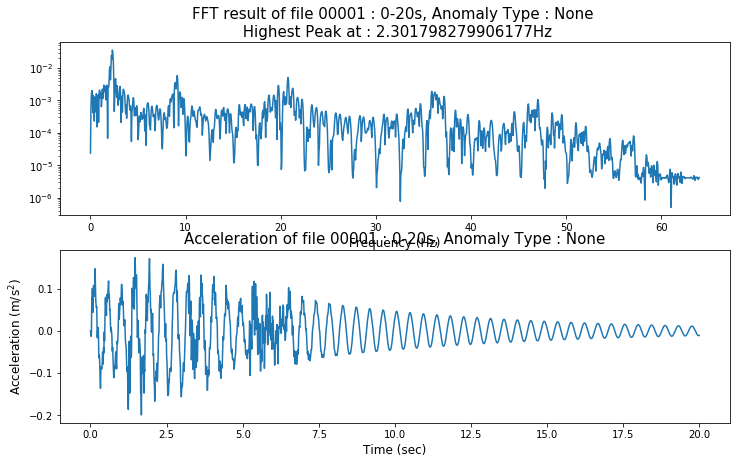

In [65]:
from scipy.fftpack import fft, fftfreq

idx = 0
data_file_path = data_files[idx]

print("File name : {}".format(osp.basename(data_file_path)))

with open(data_file_path, 'rb') as f: 
    data = pickle.load(f)

freq = 128

start_sec = 0
end_sec = 0


start = start_sec*freq
end = end_sec*freq
n_sample =  end - start
data_plot = data['acc'][6][start:end]
fft_result = fft(data_plot)
file_name = osp.basename(data_file_path)
file_number = file_name.split('_')[1]
file_number = file_number.split('.')[0]

xf = np.linspace(0.0, 1.0/(2.0)*freq, n_sample//2)
fft_abs = np.abs(fft_result[:int(len(fft_result)/2)])
highest_peak_loc = xf[np.argmax(fft_abs)]


fig, axs = plt.subplots(2, 2, figsize = (12, 7))

axs[0, 0].semilogy(xf, 2.0/n_sample * fft_abs)
axs[0, 0].set_title(
      f"FFT result of file {file_number} : {start_sec}-{end_sec}s, Anomaly Type : {data['anomal_type'][0]} \n Highest Peak at : {highest_peak_loc:.15f}Hz",
     fontsize=15)
axs[0, 0].set_xlabel("Frequency (Hz)", fontsize=12)

axs[0, 1].plot(np.arange(start=0, stop = n_sample / freq, step = 1 / freq), data_plot)
axs[0, 1].set_title(f"Acceleration of file {file_number} : {start_sec}-{end_sec}s, Anomaly Type : {data['anomal_type'][0]}", fontsize=15)
axs[0, 1].set_xlabel("Time (sec)", fontsize=12)
axs[0, 1].set_ylabel("Acceleration (m/s$^2$)", fontsize=12)


start_sec = 10
end_sec = 20

start = start_sec*freq
end = end_sec*freq
n_sample =  end - start
data_plot = data['acc'][6][start:end]
fft_result = fft(data_plot)
file_name = osp.basename(data_file_path)
file_number = file_name.split('_')[1]
file_number = file_number.split('.')[0]

xf = np.linspace(0.0, 1.0/(2.0)*freq, n_sample//2)
fft_abs = np.abs(fft_result[:int(len(fft_result)/2)])
highest_peak_loc = xf[np.argmax(fft_abs)]


axs[1, 0].semilogy(xf, 2.0/n_sample * fft_abs)
axs[1, 0].set_title(
      f"FFT result of file {file_number} : {start_sec}-{end_sec}s, Anomaly Type : {data['anomal_type'][0]} \n Highest Peak at : {highest_peak_loc:.15f}Hz",
     fontsize=15)
axs[1, 0].set_xlabel("Frequency (Hz)", fontsize=12)

axs[1, 1].plot(np.arange(start=0, stop = n_sample / freq, step = 1 / freq), data_plot)
axs[1, 1].set_title(f"Acceleration of file {file_number} : {start_sec}-{end_sec}s, Anomaly Type : {data['anomal_type'][0]}", fontsize=15)
axs[1, 1].set_xlabel("Time (sec)", fontsize=12)
axs[1, 1].set_ylabel("Acceleration (m/s$^2$)", fontsize=12)

fig.tight_layout()


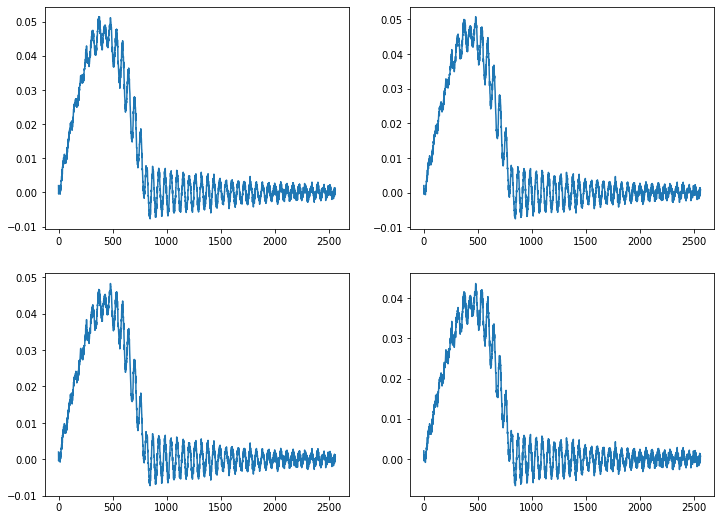

In [42]:
fig, axs = plt.subplots(2, 2, figsize = (12, 9))
axs[0, 0].plot(data['disp'][8])
# axs[0, 0].set_ylim([-0.005, 0.01])
axs[0, 1].plot(data['disp'][9])
# axs[0, 1].set_ylim([-0.005, 0.018])
axs[1, 0].plot(data['disp'][10])
# axs[1, 0].set_ylim([-0.005, 0.018])
axs[1, 1].plot(data['disp'][11])
# axs[1, 1].set_ylim([-0.005, 0.01])

In [ ]:
from dnn.datasets.bridgeFEM import bridgeFEM

In [ ]:
import torchvision.transforms as transforms

root = data_path = '/home/soojin//UOS-SSaS Dropbox/05. Data/02. Training&Test/010. FEM_anomaly/2021.07.27'

outlier_classes = []

transform = transforms.ToTensor()
target_transform = transforms.Lambda(lambda x: int(x in outlier_classes))


train_set = bridgeFEM(root=root)
train_set.load_data()

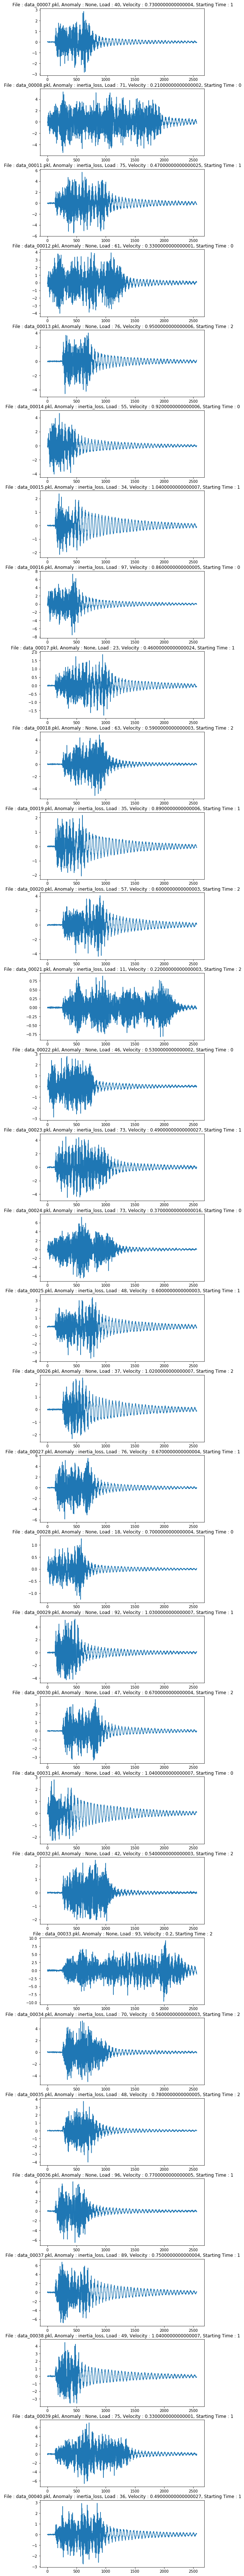

In [100]:
from glob import glob 
import os.path as osp
import pickle
import matplotlib.pyplot as plt

data_path = '/home/sss/#data/FEM_Simulation/2022.04.12 bridge anomaly random load source (velocity, starting time, load magnitude)2/train'

data_files = glob(osp.join(data_path, '*.pkl'))
data_files.sort()

# for elem in data_list :
#     print(elem)
# idx = random.randint(0, len(data_files)-1)

data_indices = [6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


fig, axs = plt.subplots(len(data_indices), 1, figsize = (8, 4*len(data_indices)))

for plt_idx, data_idx in enumerate(data_indices) : 

    data_file_path = data_files[data_idx]
    

    with open(data_file_path, 'rb') as f: 
        data = pickle.load(f)

    axs[plt_idx].plot(data['acc'][7][:])
    axs[plt_idx].set_title(f" File : {osp.basename(data_file_path)}, Anomaly : {data['anomal_type'][0]}, Load : {data['load_source']}, Velocity : {data['velocity']}, Starting Time : {data['starting_time']}")



In [113]:
import numpy as np

data_file_path_1 = data_files[31]
    
with open(data_file_path_1, 'rb') as f: 
    data_1 = pickle.load(f)

data_file_path_2 = data_files[38]
    
with open(data_file_path_2, 'rb') as f: 
    data_2 = pickle.load(f)

np.correlate(data_1['acc'][7][2000:], data_2['acc'][7][2000:])

array([1.32728916])

In [103]:
data_1

{'is_anomal': False,
 'anomal_type': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'sns_loc': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 'acc': [array([-0.00097595,  0.02835623,  0.07028493, ..., -0.08079926,
          0.04606048, -0.0429459 ]),
  array([-0.00097595,  0.02835623,  0.07028493, ..., -0.09908318,
          0.02632185, -0.06385995]),
  array([-0.00097595,  0.02835623,  0.07028493, ..., -0.1165694 ,
          0.00745238, -0.08384916]),
  array([-0.00097595,  0.02835623,  0.07028493, ..., -0.1326646 ,
         -0.00990085, -0.10222488]),
  array([-0.00097595,  0.02835623,  0.07028493, ..., -0.14674419,
         -0.02505986, -0.11826704]),
  array([-0.00097595,  0.02835623,  0.07028493, ..., -0.15826497,
         -0.03743821, -0.13135424]),
  array([-0.00

In [13]:
import matplotlib.pyplot as plt 
import numpy as np 
import struct
from scipy.fftpack import fft, fftfreq

In [14]:
def read_dam_file(filename):    
    """Convert dam file to np.array
    Args : 
        filename (str) 

    Returns : 
        output (np.arr, np.float32)  
    """
    input = np.fromfile(filename, dtype='<i4')
    output = [struct.unpack('f', x) for x in input]

    return np.array(output)

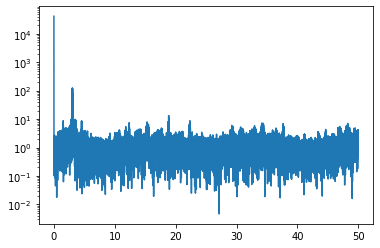

In [37]:
file_name = '/home/sss/#data/Olypic_Measurement/20170910/DY_20170910 000000_0_CA_01.dam'
data = read_dam_file(file_name)

n_sample = 60000
freq = 100
xf = np.linspace(0.0, 1.0/(2.0)*freq, n_sample//2)
fft_result = abs(fft(data[:, 0]))
fft_abs = np.abs(fft_result[:int(len(fft_result)/2)])
plt.semilogy(xf, fft_abs)
plt.show()

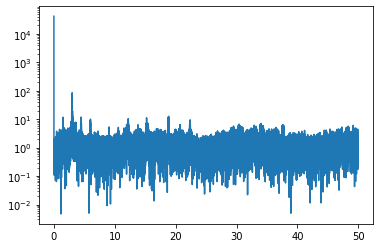

In [38]:
file_name = '/home/sss/#data/Olypic_Measurement/20170923/DY_20170923 000000_0_CA_01.dam'
data = read_dam_file(file_name)
n_sample = 60000
freq = 100
xf = np.linspace(0.0, 1.0/(2.0)*freq, n_sample//2)
fft_result = abs(fft(data[:, 0]))
fft_abs = np.abs(fft_result[:int(len(fft_result)/2)])
plt.semilogy(xf, fft_abs)
plt.show()

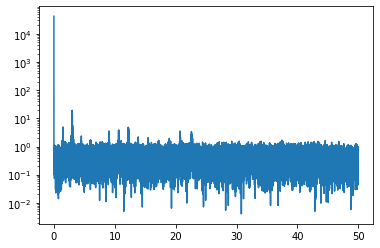

In [39]:
file_name = '/home/sss/#data/Olypic_Measurement/20171003/DY_20171003 000000_0_CA_01.dam'
data = read_dam_file(file_name)
n_sample = 60000
freq = 100
xf = np.linspace(0.0, 1.0/(2.0)*freq, n_sample//2)
fft_result = abs(fft(data[:, 0]))
fft_abs = np.abs(fft_result[:int(len(fft_result)/2)])
plt.semilogy(xf, fft_abs)
plt.show()